In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [6]:
n_samples = 1000
A = np.random.randn(n_samples, 2) * 2
centers = np.array([[0, 0], [5, 5], [-5, 5], [5, -5], [-5, -5]])


B = np.zeros((n_samples, 1))
for i in range(n_samples):
    distances = np.sqrt(np.sum((A[i] - centers) ** 2, axis=1))
    B[i] = np.argmin(distances)


def one_hot_encode(b, num_classes):
    encoded = np.zeros((len(b), num_classes))
    for i in range(len(b)):
        encoded[i, int(b[i, 0])] = 1
    return encoded

B_onehot = one_hot_encode(B, 5)



In [8]:
class MultiLayerNN:
    def __init__(self):
        self.num_input = 2
        self.num_hidden1 = 8
        self.num_hidden2 = 6
        self.num_hidden3 = 4
        self.num_output = 5

        self.lr = 0.01

        self.weight1 = np.random.randn(self.num_input, self.num_hidden1)
        self.weight2 = np.random.randn(self.num_hidden1, self.num_hidden2)
        self.weight3 = np.random.randn(self.num_hidden2, self.num_hidden3)
        self.weight4 = np.random.randn(self.num_hidden3, self.num_output)

        self.bias1 = np.zeros((1, self.num_hidden1))
        self.bias2 = np.zeros((1, self.num_hidden2))
        self.bias3 = np.zeros((1, self.num_hidden3))
        self.bias4 = np.zeros((1, self.num_output))

    def sigmoid_fn(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax_fn(self, x):
        exp_val = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_val / np.sum(exp_val, axis=1, keepdims=True)

    def forward_pass(self, inputs):

        self.h1_in = np.dot(inputs, self.weight1) + self.bias1
        self.h1_out = self.sigmoid_fn(self.h1_in)

        self.h2_in = np.dot(self.h1_out, self.weight2) + self.bias2
        self.h2_out = self.sigmoid_fn(self.h2_in)

        self.h3_in = np.dot(self.h2_out, self.weight3) + self.bias3
        self.h3_out = self.sigmoid_fn(self.h3_in)

        self.out_in = np.dot(self.h3_out, self.weight4) + self.bias4
        self.out_out = self.softmax_fn(self.out_in)

        return self.out_out

    def backward_pass(self, inputs, targets, predictions):

        err = predictions - targets

        out_delta = err

        h3_err = out_delta.dot(self.weight4.T)
        h3_delta = h3_err * self.sigmoid_fn(self.h3_out, derivative=True)

        h2_err = h3_delta.dot(self.weight3.T)
        h2_delta = h2_err * self.sigmoid_fn(self.h2_out, derivative=True)

        h1_err = h2_delta.dot(self.weight2.T)
        h1_delta = h1_err * self.sigmoid_fn(self.h1_out, derivative=True)

        self.weight4 -= self.lr * self.h3_out.T.dot(out_delta)
        self.weight3 -= self.lr * self.h2_out.T.dot(h3_delta)
        self.weight2 -= self.lr * self.h1_out.T.dot(h2_delta)
        self.weight1 -= self.lr * inputs.T.dot(h1_delta)

        self.bias4 -= self.lr * np.sum(out_delta, axis=0, keepdims=True)
        self.bias3 -= self.lr * np.sum(h3_delta, axis=0, keepdims=True)
        self.bias2 -= self.lr * np.sum(h2_delta, axis=0, keepdims=True)
        self.bias1 -= self.lr * np.sum(h1_delta, axis=0, keepdims=True)

    def train_step(self, inputs, targets):
        predictions = self.forward_pass(inputs)
        self.backward_pass(inputs, targets, predictions)
        return predictions

    def predict_class(self, inputs):
        predictions = self.forward_pass(inputs)
        return np.argmax(predictions, axis=1)


mlp = MultiLayerNN()
losses = []
accs = []

print("Training multi-layer NN for 5-class classification...")
print("Architecture: 2 → 8 → 6 → 4 → 5")
print()

for epoch_idx in range(1000):
    preds = mlp.train_step(A, B_onehot)

    current_loss = -np.mean(B_onehot * np.log(preds + 1e-10))
    losses.append(current_loss)

    pred_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(B_onehot, axis=1)
    current_acc = np.mean(pred_labels == true_labels)
    accs.append(current_acc)

    if epoch_idx % 100 == 0:
        print(f"Epoch {epoch_idx}: Loss = {current_loss:.4f}, Accuracy = {current_acc:.4f}")


Training multi-layer NN for 5-class classification...
Architecture: 2 → 8 → 6 → 4 → 5

Epoch 0: Loss = 0.4570, Accuracy = 0.0360
Epoch 100: Loss = 0.1333, Accuracy = 0.8660
Epoch 200: Loss = 0.1139, Accuracy = 0.8660
Epoch 300: Loss = 0.0962, Accuracy = 0.8660
Epoch 400: Loss = 0.0721, Accuracy = 0.8410
Epoch 500: Loss = 0.0310, Accuracy = 0.9110
Epoch 600: Loss = 0.0616, Accuracy = 0.8640
Epoch 700: Loss = 0.0185, Accuracy = 0.9690
Epoch 800: Loss = 0.0331, Accuracy = 0.9370
Epoch 900: Loss = 0.0182, Accuracy = 0.9650


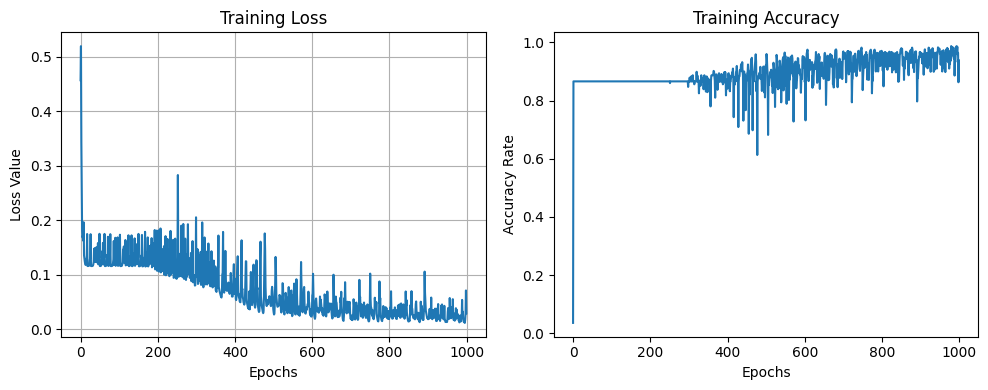

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(losses)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss Value')
axs[0].grid(True)


axs[1].plot(accs)
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy Rate')

plt.tight_layout()
plt.show()


In [12]:
print("Evaluating random test points:")

sample_points = np.array([
    [0, 0],
    [5, 5],
    [-5, 5],
    [5, -5],
    [-5, -5],
])

for idx, pt in enumerate(sample_points):
    pred_class = mlp.predict_class(pt.reshape(1, -1))[0]
    print(f"Point {pt}: Predicted Class = {pred_class} (Actual Class = {idx})")


Evaluating random test points:
Point [0 0]: Predicted Class = 0 (Actual Class = 0)
Point [5 5]: Predicted Class = 1 (Actual Class = 1)
Point [-5  5]: Predicted Class = 2 (Actual Class = 2)
Point [ 5 -5]: Predicted Class = 3 (Actual Class = 3)
Point [-5 -5]: Predicted Class = 4 (Actual Class = 4)


In [13]:
print("Printing all classes on training data:")

all_preds = mlp.predict_class(A)
true_labels = np.argmax(B_onehot, axis=1)

overall_acc = np.mean(all_preds == true_labels)
print(f"Overall Accuracy on Training Data: {overall_acc:.4f}")


Printing all classes on training data:
Overall Accuracy on Training Data: 0.9450


In [14]:
print(f"\nInitial loss: {losses[0]:.4f}")
print(f"Final loss: {losses[-1]:.4f}")
print(f"Loss decreased by: {losses[0] - losses[-1]:.4f}")



Initial loss: 0.4570
Final loss: 0.0291
Loss decreased by: 0.4279


In [15]:

predictions = mlp.predict_class(A)
true_labels = np.argmax(B_onehot, axis=1)

num_classes = 5
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

for i in range(len(true_labels)):
    conf_matrix[true_labels[i], predictions[i]] += 1

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[813   4  10  18  21]
 [  0  36   0   0   0]
 [  1   0  32   0   0]
 [  1   0   0  35   0]
 [  0   0   0   0  29]]


In [16]:
print("\nClass-wise Performance:")
for class_idx in range(5):
    tp = conf_matrix[class_idx, class_idx]
    fp = np.sum(conf_matrix[:, class_idx]) - tp
    fn = np.sum(conf_matrix[class_idx, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Class {class_idx}: Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")



Class-wise Performance:
Class 0: Precision=0.9975, Recall=0.9388, F1=0.9673
Class 1: Precision=0.9000, Recall=1.0000, F1=0.9474
Class 2: Precision=0.7619, Recall=0.9697, F1=0.8533
Class 3: Precision=0.6604, Recall=0.9722, F1=0.7865
Class 4: Precision=0.5800, Recall=1.0000, F1=0.7342
